# Máquina de Vetores de Suporte

Estudo sobre SVM, modelo poderoso e versátil de Aprendizado de Máquina capaz de realizar classificações lineares ou não lineares, regressão e até mesmo identificar outliers.

## SVM Linear
Utilizado um dataset sobre flores irís.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)] #largura e comprimento das petálas 
y = (iris["target"]==2).astype(np.float64) #Irís Virgínica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])
    
svm_clf.fit(X,y)

svm_clf.predict([[5.5,1.7]])

array([1.])

## SVM Não Linear
Lida com dados não linearmente separados. Dados lineares geralmente com uma característica podem ser linearmente separáveis com adição de mais caracterísica (através da Regressão Polinomial por exemplo.Usando um conjunto de dados em formato de lua.

c:\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


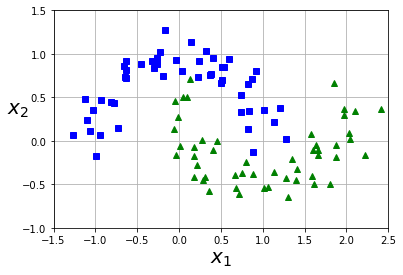

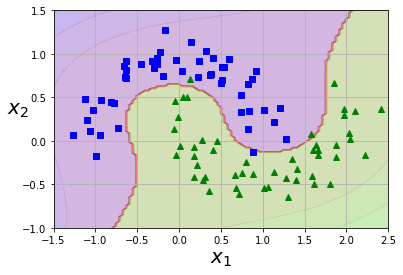

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X,y)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])


## Kernel Polinomial
Outro jeito de adicionar características ao conjunto de dados.

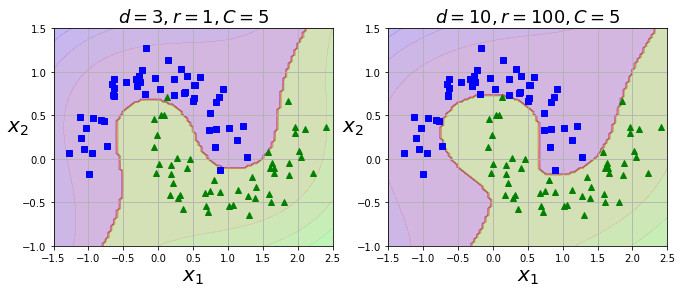

In [5]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("sclar", StandardScaler()),
    ("smv_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X,y)

poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

A esqueda um kernel polinômial de grau 3 e a direita de grau 10. Lembrando que é possível encontrar um ótima combinação de hiperparametros através de um busca em grade(GridSearch)

## Kernel RBF Gaussiano
"Cria" características de similaridade com as características já existentes do conjunto de dados. Ajustar o valor de gamma para melhorar os resultados

In [6]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

## Regressão SVM
Como dito no começo desse estudo, o algoritmo SVM também pode ser utilizado para Regressão.
Para isso se faz o inverso, a intenção e manter as instancias na via em vez de fora dela.

### Regressão Linear

In [8]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5) #parâmetro que controla a largura da via
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

### Regressão SVR

In [9]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, degree=2, kernel='poly')